# РК1 по дисциплине Технологии машинного обучения

## Задание (вариант 13):

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Дополнительное задание (группа ИУ5-62Б): для произвольной колонки данных построить гистограмму

Датасет: https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Admission_Predict.csv")
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

В наборе данных отсутствовали пропущенные значения, поэтому для анализа были искусственно созданы пропуски в одном количественном и одном категориальном признаке

In [7]:
np.random.seed(42)
missing_gre = np.random.choice(df.index, size=10, replace=False)
missing_rating = np.random.choice(df.index, size=10, replace=False)

df.loc[missing_gre, 'GRE Score'] = np.nan
df.loc[missing_rating, 'University Rating'] = np.nan

df.isna().sum()

Serial No.            0
GRE Score            10
TOEFL Score           0
University Rating    10
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

### Количественный признак: 'GRE Score' 
Для обработки пропусков в признаке 'GRE Score' (оценка за тест GRE) был использован метод импутации с использованием медианы.   
Медиана устойчива к выбросам и подходит для данных с потенциально несимметричным распределением.  
Это позволяет сохранить центральную тенденцию данных без значительного искажения их структуры

In [8]:
df['GRE Score'].fillna(df['GRE Score'].median(), inplace=True)

### Категориальный признак: 'University Rating'
Для обработки пропусков в признаке 'University Rating' (рейтинг университета) был использован метод импутации с использованием моды.   
Мода — это наиболее часто встречающееся значение в категориальном признаке, и она является стандартным выбором для заполнения пропусков, когда нет дополнительной информации для более сложных методов

In [9]:
df['University Rating'].fillna(df['University Rating'].mode()[0], inplace=True)

In [10]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Выбор признаков для модели
Оставляем следующие признаки:

- GRE Score
- TOEFL Score
- University Rating
- SOP
- LOR
- CGPA
- Research

Все признаки могут влиять на вероятность поступления.  
Research — бинарный категориальный, важно учитывать для вероятности поступления в магистратуру.  
GRE, TOEFL, CGPA — ключевые метрики при поступлении.  
University Rating, SOP, LOR — менее объективны, но всё равно используются

In [11]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.850000,107.410000,3.080000,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.217266,6.069514,1.125507,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,309.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Построим гистограмму для признака CGPA

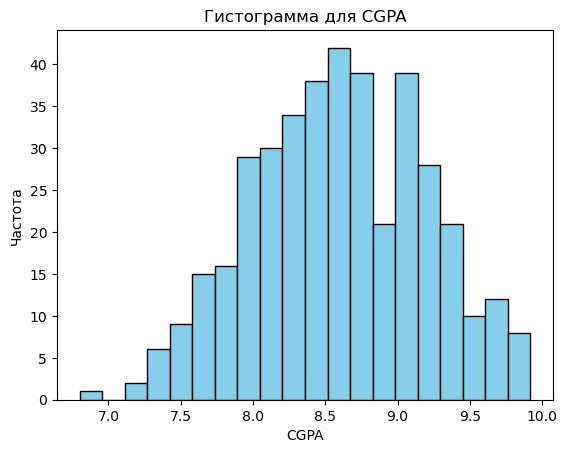

In [13]:
plt.hist(df['CGPA'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма для CGPA')
plt.xlabel('CGPA')
plt.ylabel('Частота')
plt.show()